In [23]:
# Import pandas library for data manipulation and analysis
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import seaborn for statistical data visualization
import seaborn as sns
# Import matplotlib.pyplot for creating plots and visualizations
import matplotlib.pyplot as plt
# Import datetime class from datetime module for handling date and time
from datetime import datetime as dt
# Import FuncFormatter from matplotlib.ticker to customize tick labels on plot axes
from matplotlib.ticker import FuncFormatter

In [10]:
# Read sales data from Excel file
# - Skip first 4 rows (likely headers or metadata)
# - Parse the OrderDate column as datetime
# - Explicitly set data types for columns to ensure proper data handling:
#   - Integer columns: OrderNumber, ProductKey, SalespersonKey, Quantity, UnitPrice
#   - String columns: Salesperson, Supervisor, Manager, Channel
sa=pd.read_excel("Sales csv File path",
                 skiprows=range(0,4),
                 parse_dates=["OrderDate"],dtype={"OrderNumber" : "int64","ProductKey"	: "int64","SalespersonKey" : "int64","Salesperson" : "string",
                                                  "Supervisor" : "string" ,"Manager" : "string","Channel" : "string" , "Quantity" : "int64","UnitPrice" : "int64"})

In [ ]:
# Check the data types of each column in the DataFrame 'df'
# This helps understand what kind of data we're working with (e.g., integers, floats, strings)
df.dtypes

In [207]:
# Read all sheets from the Excel file 'Budget.xlsx', skipping the first two rows (rows 0 and 1)
# The header is taken from row 3 (index 0 after skipping)
# Returns a dictionary with sheet names as keys and DataFrames as values
df1=pd.read_excel("Budget csv file path",sheet_name=None,skiprows=[0,1],header=0)

In [211]:
# Create a copy of the "2019" column from df1 dataframe and assign it to sh1 variable
sh1=df1["2019"].copy()

In [ ]:
sh1.head()

In [104]:
# sh1.drop(index=[0,1],inplace=True)

In [106]:
#sh1=sh1.set_index("SalespersonID")

In [215]:
# Reshape the dataframe from wide to long format:
# - Keep 'SalespersonID' as an identifier column
# - Convert column names to a new 'Month' column
# - Convert values to a new 'Sales' column
sh1=pd.melt(sh1,id_vars="SalespersonID",var_name="Month",value_name="Sales")

In [217]:
sh1.shape

(169, 3)

In [219]:
# Remove rows where SalespersonID is "Grand Total" from the dataframe
sh1=sh1[~sh1["SalespersonID"].isin(["Grand Total"])]
# Filter the dataframe to only include rows where Month is between 0 and 12 (inclusive)
sh1=sh1[sh1["Month"].isin(list(range(0,13)))]

In [221]:
sh1.head()

,SalespersonID,Month,Sales
0,102,1,NaN
1,125,1,9016.031000
2,144,1,9870.923721
3,183,1,1394.216707
4,194,1,NaN


In [223]:
# Create a copy of the "2020" column from df1 dataframe and assign it to sh2 variable
sh2=df1["2020"].copy()

In [225]:
sh2.head()

,SalespersonID,1,2,3,4,5,6,7,8,9,10,11,12,Unnamed: 13
0,102,1234.637355,592.011475,1489.756222,327.940551,1572.272369,16183.099002,11610.272984,113905.547304,14713.135902,5249.579781,54571.701098,109663.095896,3.311130e+05
1,125,312276.117163,24709.557941,140610.127712,155937.041195,76518.744621,81407.391455,293979.632584,33117.314251,143321.249946,28246.165858,176340.501879,52050.275094,1.518514e+06
2,144,75701.645884,160400.228426,99282.683547,81827.841978,68665.499370,22400.077011,259225.980011,90309.513108,205345.503021,157709.558130,329406.147121,25863.359834,1.576138e+06
3,183,33584.190900,9294.077639,58293.177802,54969.987317,96615.740530,48435.548953,5708.312397,1060.099960,NaN,NaN,11108.807918,5986.871435,3.250568e+05
4,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718.669315,3775.737147,114238.156399,101339.253000,69638.152934,2.907100e+05


In [227]:
# Reshape the dataframe from wide to long format:
# - Keep 'SalespersonID' as an identifier column
# - Convert column names to a new 'Month' column
# - Convert values to a new 'Sales' column
sh2=pd.melt(sh2,id_vars="SalespersonID",var_name="Month",value_name="Sales")

In [229]:
sh2.head()

,SalespersonID,Month,Sales
0,102,1,1234.637355
1,125,1,312276.117163
2,144,1,75701.645884
3,183,1,33584.190900
4,194,1,NaN


In [231]:
# Remove rows where SalespersonID is "Grand Total" to exclude summary rows
sh2=sh2[~sh2["SalespersonID"].isin(["Grand Total"])]
# Filter to keep only rows with Month values between 0-12 (valid months)
sh2=sh2[sh2["Month"].isin(list(range(0,13)))]

In [233]:
sh2.head()

,SalespersonID,Month,Sales
0,102,1,1234.637355
1,125,1,312276.117163
2,144,1,75701.645884
3,183,1,33584.190900
4,194,1,NaN


In [235]:
# Create a copy of the "2021" column from df1 dataframe and assign it to sh3 variable
sh3=df1["2021"].copy()

In [237]:
sh3.head()

,SalespersonID,1,2,3,4,5,6,7,8,9,10,11,12,Unnamed: 13
0,102,621.347979,26818.933125,1098.150552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28538.431656
1,125,68760.343380,50346.442174,12.520404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119119.305958
2,144,64875.707847,11169.105034,112.478255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76157.291136
3,183,8305.591140,26989.161573,24479.100431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59773.853144
4,194,58016.726242,13842.417084,1541.757158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73400.900484


In [239]:
# Reshape the dataframe from wide to long format:
# - Keep 'SalespersonID' as an identifier column
# - Convert column names to a new 'Month' column
# - Convert values to a new 'Sales' column
sh3=pd.melt(sh3,id_vars="SalespersonID",var_name="Month",value_name="Sales")

In [241]:
sh3.head()

,SalespersonID,Month,Sales
0,102,1,621.347979
1,125,1,68760.343380
2,144,1,64875.707847
3,183,1,8305.591140
4,194,1,58016.726242


In [243]:
# Remove rows where SalespersonID is "Grand Total"
sh3=sh3[~sh3["SalespersonID"].isin(["Grand Total"])]
# Filter to keep only rows where Month is between 0 and 12 (inclusive)
sh3=sh3[sh3["Month"].isin(list(range(0,13)))]

In [245]:
sh3.head()

,SalespersonID,Month,Sales
0,102,1,621.347979
1,125,1,68760.343380
2,144,1,64875.707847
3,183,1,8305.591140
4,194,1,58016.726242


In [247]:
# Convert numeric month values to date objects
# For sheet 1, set all dates to 2019 with the given month and day=1
sh1["Month"] = sh1["Month"].apply(lambda x : dt(2019, x, 1).date())
# For sheet 2, set all dates to 2020 with the given month and day=1
sh2["Month"] = sh2["Month"].apply(lambda x : dt(2020, x, 1).date())
# For sheet 3, set all dates to 2021 with the given month and day=1
sh3["Month"] = sh3["Month"].apply(lambda x : dt(2021, x, 1).date())

In [253]:
sh1.head()

,SalespersonID,Month,Sales
0,102,2019-01-01,NaN
1,125,2019-01-01,9016.031000
2,144,2019-01-01,9870.923721
3,183,2019-01-01,1394.216707
4,194,2019-01-01,NaN


In [255]:
sh2.head()

,SalespersonID,Month,Sales
0,102,2020-01-01,1234.637355
1,125,2020-01-01,312276.117163
2,144,2020-01-01,75701.645884
3,183,2020-01-01,33584.190900
4,194,2020-01-01,NaN


In [257]:
sh3.head()

,SalespersonID,Month,Sales
0,102,2021-01-01,621.347979
1,125,2021-01-01,68760.343380
2,144,2021-01-01,64875.707847
3,183,2021-01-01,8305.591140
4,194,2021-01-01,58016.726242


In [259]:
# Rename the "Month" column to "Date" in each dataframe (sh1, sh2, sh3)
# The inplace=True parameter modifies the dataframes directly without requiring reassignment
sh1.rename(columns={"Month":"Date"}, inplace=True)
sh2.rename(columns={"Month":"Date"}, inplace=True)
sh3.rename(columns={"Month":"Date"}, inplace=True)

In [265]:
# Concatenate the three dataframes (sh1, sh2, sh3) vertically into a single dataframe
df1=pd.concat([sh1,sh2,sh3])
# Display the first 5 rows of the concatenated dataframe
df1.head()

,SalespersonID,Date,Sales
0,102,2019-01-01,NaN
1,125,2019-01-01,9016.031000
2,144,2019-01-01,9870.923721
3,183,2019-01-01,1394.216707
4,194,2019-01-01,NaN


In [275]:
df1.dtypes

SalespersonID     object
Date              object
Sales            float64
dtype: object

In [277]:
# Save the DataFrame df1 to a CSV file named "Finale.csv" without including the index
df1.to_csv("Finale.csv",index=False)

# Read the saved CSV file back into a new DataFrame called 'bu'
bu=pd.read_csv("Finale.csv")

# Rename the "Sales" column to "Budget" in the DataFrame 'bu'
bu.rename(columns={"Sales":"Budget"},inplace=True)

In [19]:
pr=pd.read_excel("Product csv File path")

In [739]:
pr.head()

,ID,ProductName,ProductGroup,ProductCategory
0,108,Product 108,Ground Coffee,Food
1,111,Product 111,Vegetable,Food
2,114,Product 114,Spices,Food
3,118,Product 118,Spices,Food
4,120,Product 120,Spices,Food


In [293]:
pr.isnull().sum()

ID                 0
ProductName        0
ProductGroup       0
ProductCategory    0
dtype: int64

In [36]:
# Calculate the total sale amount by multiplying quantity by unit price
sa["saleamt"] = sa["Quantity"] * sa["UnitPrice"]

In [305]:
# Group the sales data by Channel, calculate the sum of sales amount for each channel,
# and reset the index to convert the result from a Series to a DataFrame
rev_by_ch=sa.groupby("Channel").agg({"saleamt":"sum"}).reset_index()

In [307]:
import seaborn as sns

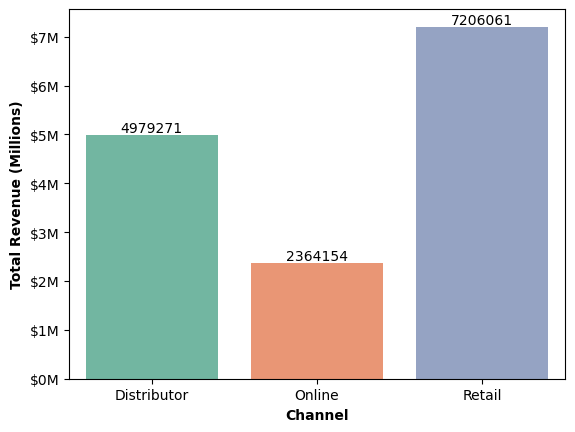

In [311]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()
from matplotlib.ticker import FuncFormatter

# Define a custom color palette for different sales channels
custom_palette = {
    'Distributor': (102/255, 194/255, 165/255),  # Teal
    'Online': (252/255, 141/255, 98/255),        # Coral
    'Retail': (141/255, 160/255, 203/255)         # Soft Blue
}

# Create a bar plot showing revenue by channel
sns.barplot(x="Channel", y="saleamt", data=rev_by_ch, ax=ax, palette=custom_palette)

# Format y-axis to display values in millions of dollars
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width()/2, height), 
                ha="center", va="bottom", fontsize=10, color='black')

# Set axis labels with custom formatting
plt.ylabel("Total Revenue (Millions)", color="black", fontsize=10, fontweight='semibold')
plt.xlabel("Channel", color="black", fontsize=10, fontweight='semibold')

# Display the plot
plt.show()

In [122]:
# Group the 'sa' dataframe by 'Salesperson' column and calculate the sum of 'saleamt' for each salesperson
# Store the result in a new dataframe 'rev_emp' with a column named 'Revenue'
rev_emp=sa.groupby("Salesperson").agg(Revenue=("saleamt","sum"))

In [124]:
# Reset the index of the rev_emp DataFrame, making the current index into a column
# The inplace=True parameter modifies the DataFrame directly instead of returning a new one
rev_emp.reset_index(inplace=True)

In [126]:
# Sort 'rev_emp' DataFrame by the 'Revenue' column in descending order (highest first),
# and modify the original DataFrame directly without creating a new one.
rev_emp.sort_values("Revenue", ascending=False, inplace=True)

In [128]:
rev_emp

,Salesperson,Revenue
0,Carla Ferreira,3851349
8,Julio Lima,2681698
4,Gustavo Gomes,2034823
2,Felipe Goncalves,1259938
10,Leonardo Cardoso,1240313
5,Isabella Sousa,809879
9,Kaua Araujo,797786
11,Mateus Costa,621027
6,Julia Silva,483189
3,Gustavo Barros,481467


<Figure size 640x480 with 0 Axes>

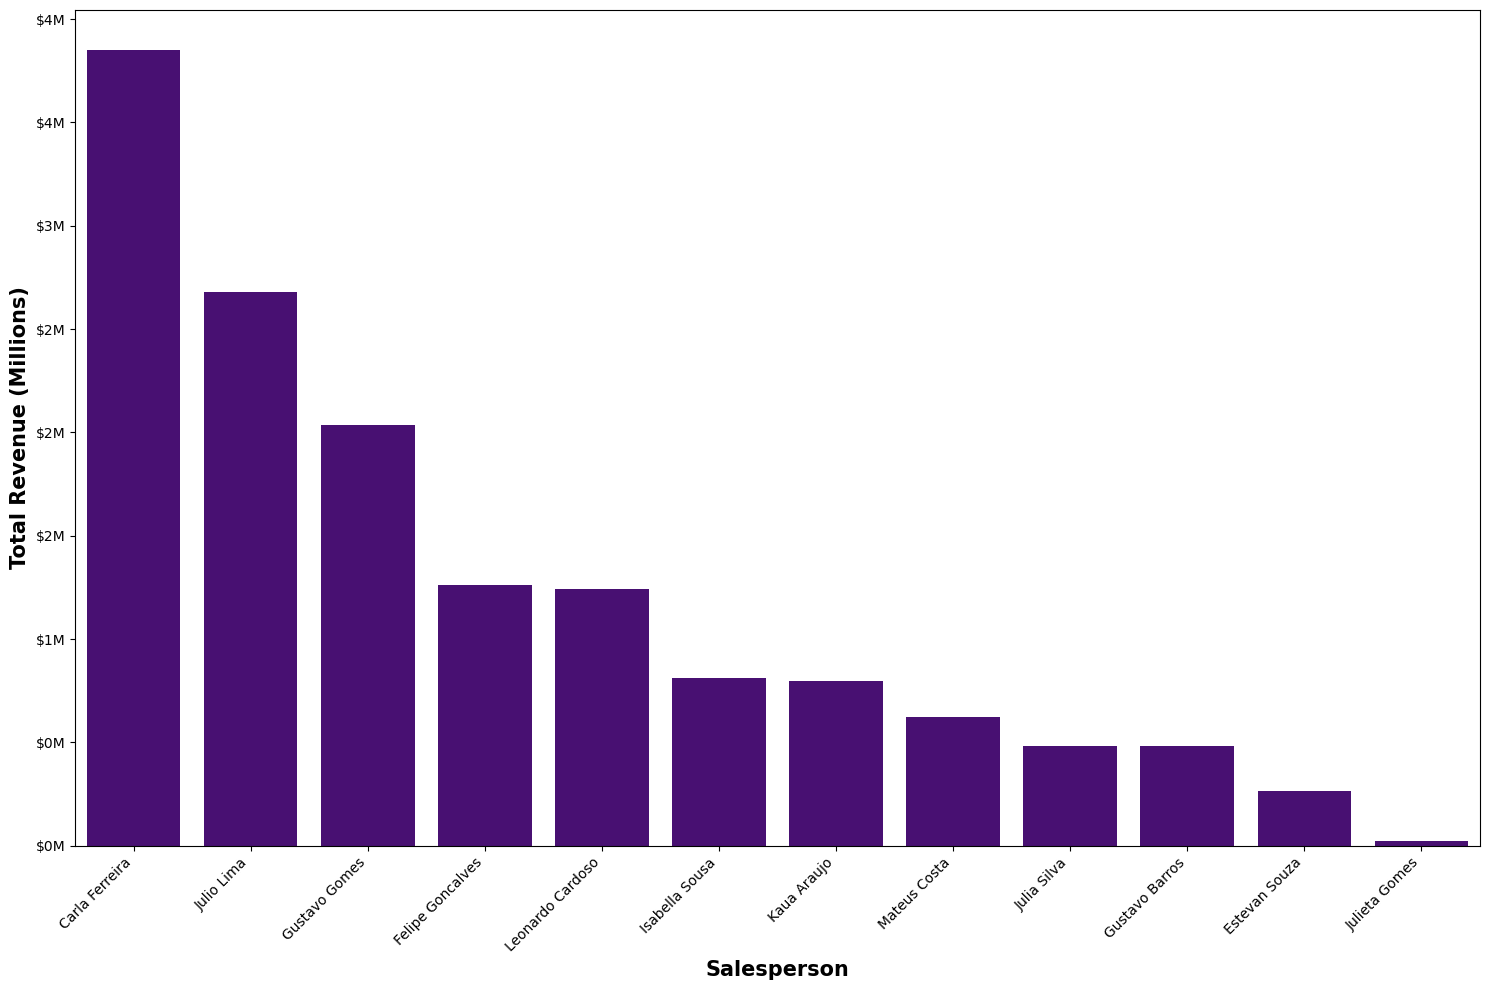

In [144]:
# Create a figure and axis object with specified size
fig, ax = plt.subplots(figsize=(15, 10))

# Define a custom pleasant color in RGB format (normalized between 0 and 1)
pleasant_color = (0.294, 0.000, 0.510)

# Import FuncFormatter to format y-axis tick labels
from matplotlib.ticker import FuncFormatter

# Create a barplot showing Revenue by Salesperson
sns.barplot(x="Salesperson", y="Revenue", data=rev_emp, color=pleasant_color)

# Format y-axis ticks to display values in millions with a dollar sign
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))

# Rotate x-axis labels 45 degrees for better readability
plt.xticks(rotation=45, ha="right")

# Set y-axis label with custom style
plt.ylabel("Total Revenue (Millions)", color="black", fontsize=15, fontweight='semibold')

# Set x-axis label with custom style
plt.xlabel("Salesperson", color="black", fontsize=15, fontweight='semibold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [323]:
rev_by_ch

,Channel,saleamt
0,Distributor,4979271
1,Online,2364154
2,Retail,7206061


In [ ]:
bu.Date=bu.Date.apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

In [132]:
# Group the 'sa' DataFrame by 'Supervisor', summing the 'saleamt' column to get total revenue per supervisor.
# Then reset the index to convert the groupby result into a DataFrame and sort it by Revenue in descending order.
rev_by_sup = sa.groupby("Supervisor").agg(Revenue=("saleamt", "sum")).reset_index().sort_values("Revenue", ascending=False)

In [134]:
rev_by_sup

,Supervisor,Revenue
0,Diego Araujo,5091662
1,Diogo Carvalho,4979271
4,Sofia Ribeiro,2364154
2,Emily Rocha,1316613
3,Fernando Silva,797786


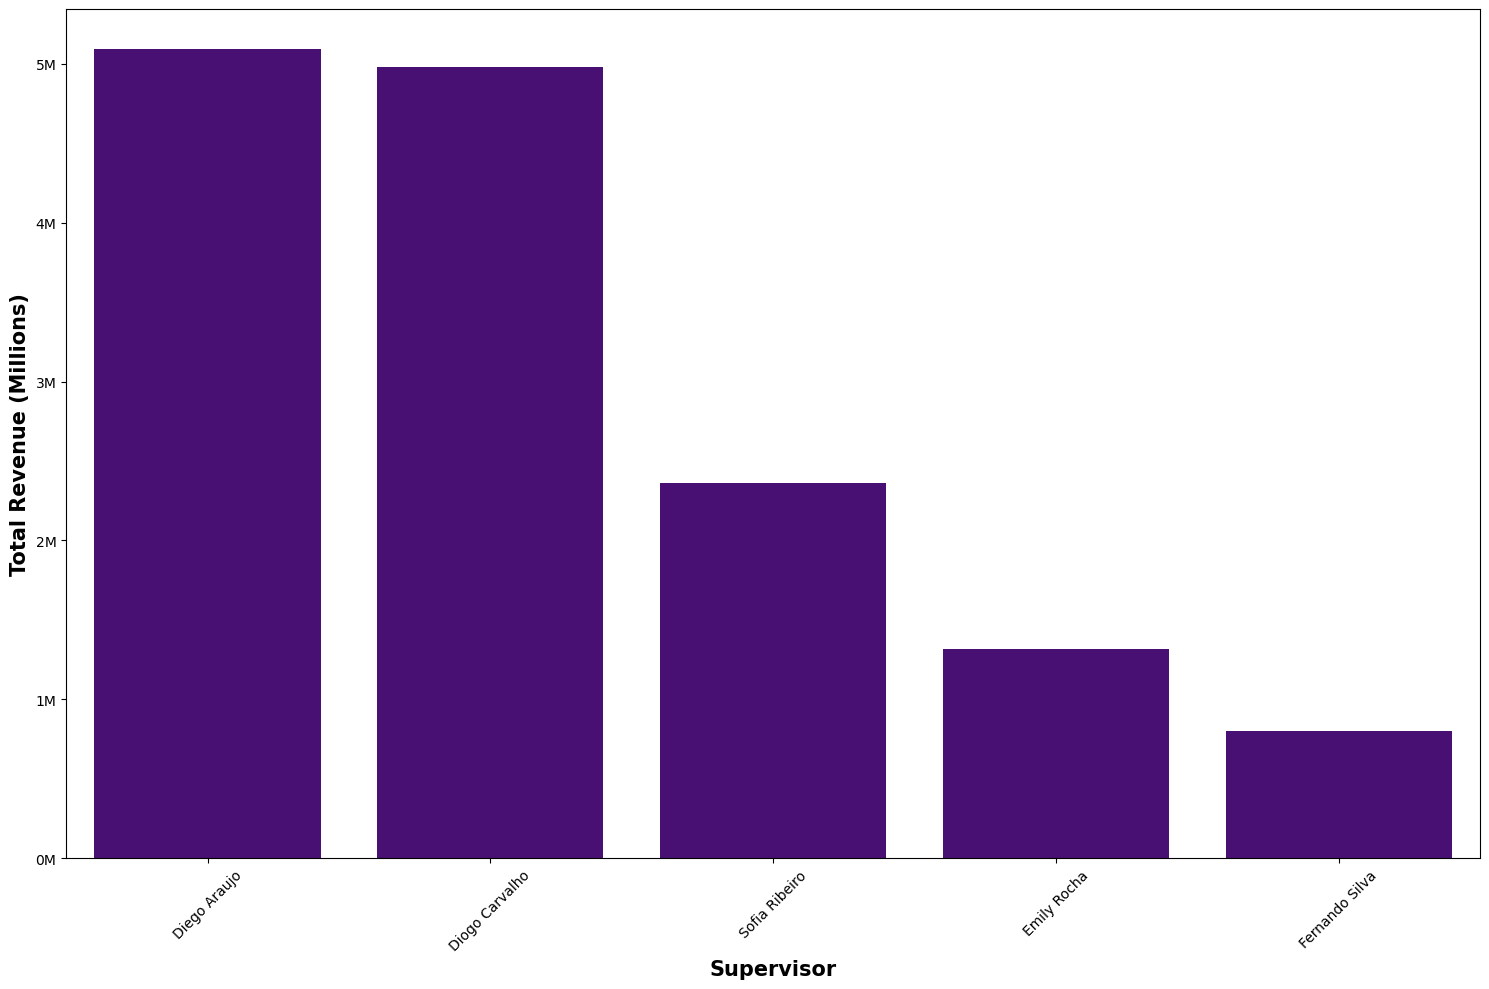

In [152]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(15, 10))

# Define a pleasant color (not used here but seems intended for styling)
pleasant_color = (186/255, 145/255, 216/255)

# Create a barplot of Revenue by Supervisor using seaborn
sns.barplot(
    x="Supervisor",
    y="Revenue",
    data=rev_by_sup,
    ax=ax,
    color=(0.294, 0.000, 0.510)  # Deep purple color
)

# Format the y-axis labels to show revenue in millions (e.g., 3M)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Set x and y axis labels with styling
ax.set_xlabel("Supervisor", color="black", fontsize=15, fontweight='semibold')
ax.set_ylabel("Total Revenue (Millions)", color="black", fontsize=15, fontweight='semibold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

In [154]:
# Group the sales data by Manager, calculate total revenue per manager,
# then reset the index and sort by revenue in descending order
rev_by_man = (
    sa.groupby("Manager")
      .agg(Revenue=("saleamt", "sum"))
      .reset_index()
      .sort_values("Revenue", ascending=False)
)

In [156]:
rev_by_man

,Manager,Revenue
0,Gabriel Azevedo,7343425
1,Victor Castro,7206061


Text(0.5, 0, 'Manager')

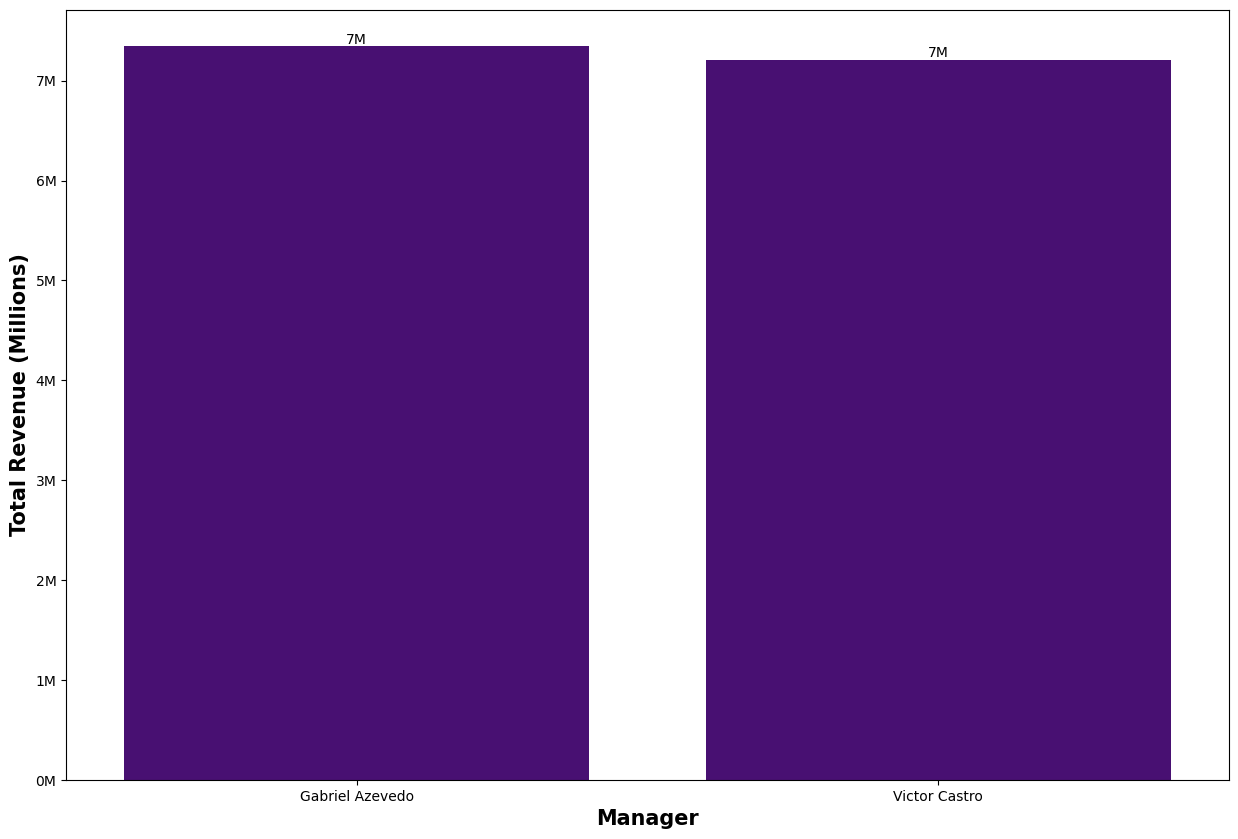

In [162]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="Manager", y="Revenue", data=rev_by_man, color=(0.294, 0.000, 0.510), ax=ax)

# Annotate each bar with its height in millions
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / 1e6:.0f}M', (p.get_x() + p.get_width() / 2, height),
                ha="center", va="bottom", fontsize=10)

# Format y-axis to show values in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))

# Label axes
ax.set_ylabel("Total Revenue (Millions)", color="black", fontsize=15, fontweight='semibold')
ax.set_xlabel("Manager", color="black", fontsize=15, fontweight='semibold')

# Improve layout and readability
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [466]:
# Filter sales data to include only orders from the year 2019
actualrev = sa[sa["OrderDate"].dt.year == 2019]

# Filter budget data to include only entries from the year 2019
exprev = bu[bu["Date"].dt.year == 2019]

In [552]:
# Group actual revenue data by month and sum the sales amount
actual = actualrev.groupby(actualrev["OrderDate"].dt.month).agg(
    Revenue=("saleamt", "sum")
).reset_index()

# Group expected (budget) data by month and sum the budget values
expected = exprev.groupby(exprev["Date"].dt.month).agg(
    Revenue=("Budget", "sum")
).reset_index()

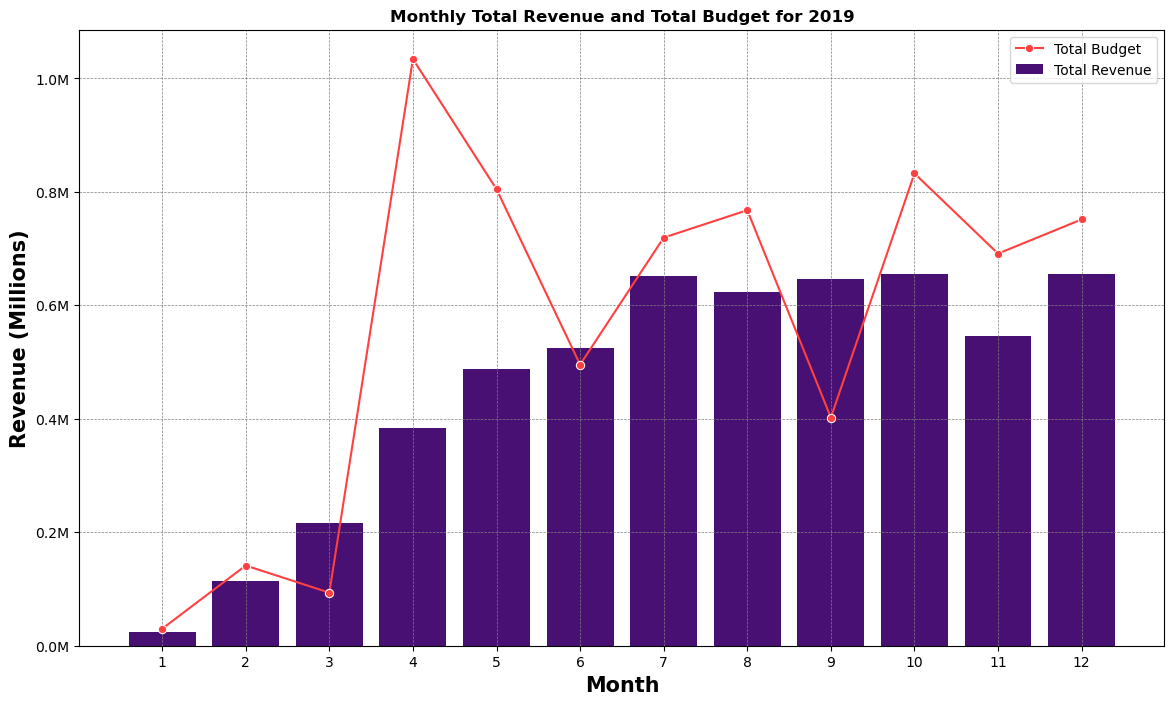

<Figure size 640x480 with 0 Axes>

In [679]:
# Create a figure with a specified size (14 inches by 8 inches)
plt.figure(figsize=(14,8))

# Create a bar plot for actual revenue with the 'OrderDate' on the x-axis and 'Revenue' on the y-axis
# Use a purple color for the bars and add a label for the legend
ax = sns.barplot(x="OrderDate", y="Revenue", data=actual, errorbar=None, color=(0.294, 0.000, 0.510), label="Total Revenue")

# Create a line plot for expected revenue using the 'Revenue' from the 'expected' dataset
# The x-axis uses a range from 0 to 11 (for 12 months), and 'Revenue' from 'expected' is plotted on the y-axis
# Use a red color for the line with markers ('o') and add a label for the legend
sns.lineplot(x=range(12), y=expected["Revenue"], ax=ax, errorbar=None, marker="o", color=(1.000, 0.251, 0.251), label="Total Budget")

# Set the x-ticks to range from 0 to 11 (corresponding to months in the year)
ax.set_xticks(range(12))

# Format the y-axis to display the values in millions with one decimal place (e.g., 2.5M, 3.1M)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{x/1e6:.1f}M'))

# Enable a grid with dashed lines for better readability of the plot
# Set grid color to gray, line style to dashed, and line width to 0.5
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

# Add a legend to the upper right corner of the plot to label the two lines
plt.legend(loc="upper right")

# Set the x-axis label to "Month", with black color, font size 15, and bold font weight
ax.set_xlabel("Month", color="black", fontsize=15, fontweight='semibold')

# Set the y-axis label to "Revenue (Millions)", with black color, font size 15, and bold font weight
ax.set_ylabel("Revenue (Millions)", color="black", fontsize=15, fontweight='semibold')

# Set the title of the plot to "Monthly Total Revenue and Total Budget for 2019"
# The title has black color and bold font weight
ax.set_title("Monthly Total Revenue and Total Budget for 2019", fontweight="semibold", color="black")

# Adjust the layout of the plot to make sure everything fits within the figure without overlapping
plt.tight_layout()

# Display the plot
plt.show()

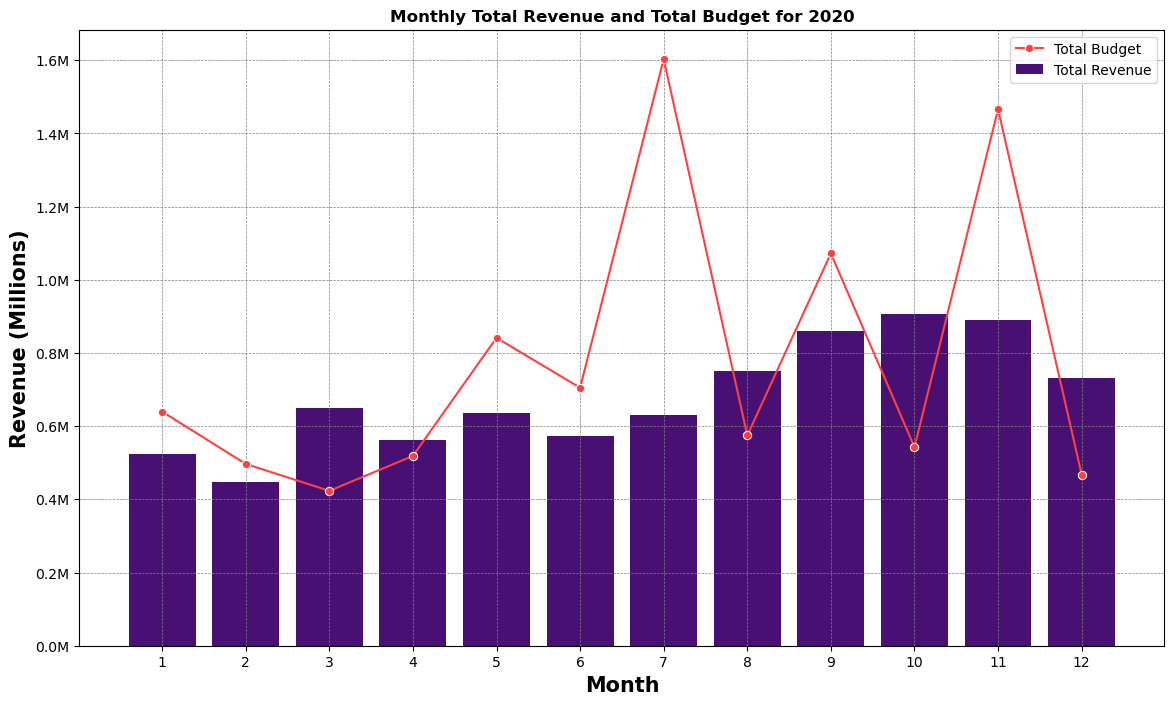

<Figure size 640x480 with 0 Axes>

In [681]:
# Filter actual revenue data for the year 2020
actualrev1 = sa[sa["OrderDate"].dt.year == 2020]

# Filter expected revenue (budget) data for the year 2020
exprev1 = bu[bu["Date"].dt.year == 2020]

# Group the actual revenue data by month and sum the 'saleamt' column to get total revenue for each month
actual1 = actualrev1.groupby([actualrev1["OrderDate"].dt.month]).agg(Revenue=("saleamt", "sum")).reset_index()

# Group the expected revenue (budget) data by month and sum the 'Budget' column to get total budget for each month
expected1 = exprev1.groupby([exprev1["Date"].dt.month]).agg(Revenue=("Budget", "sum")).reset_index()

# Create a figure with a specified size (14 inches by 8 inches)
plt.figure(figsize=(14, 8))

# Create a bar plot for actual revenue with the 'OrderDate' on the x-axis and 'Revenue' on the y-axis
# Use a purple color for the bars and add a label for the legend
ax = sns.barplot(x="OrderDate", y="Revenue", data=actual1, errorbar=None, color=(0.294, 0.000, 0.510), label="Total Revenue")

# Create a line plot for expected revenue using the 'Revenue' from the 'expected1' dataset
# The x-axis uses a range from 0 to 11 (for 12 months), and 'Revenue' from 'expected1' is plotted on the y-axis
# Use a red color for the line with markers ('o') and add a label for the legend
sns.lineplot(x=range(len(expected1["Date"])), y=expected1["Revenue"], data=expected1, ax=ax, errorbar=None, marker="o", color=(1.000, 0.251, 0.251), label="Total Budget")

# Format the y-axis to display the values in millions with one decimal place (e.g., 2.5M, 3.1M)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Enable a grid with dashed lines for better readability of the plot
# Set grid color to gray, line style to dashed, and line width to 0.5
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

# Add a legend to the upper right corner of the plot to label the two lines
plt.legend(loc="upper right")

# Set the x-axis label to "Month", with black color, font size 15, and bold font weight
ax.set_xlabel("Month", color="black", fontsize=15, fontweight='semibold')

# Set the y-axis label to "Revenue (Millions)", with black color, font size 15, and bold font weight
ax.set_ylabel("Revenue (Millions)", color="black", fontsize=15, fontweight='semibold')

# Set the title of the plot to "Monthly Total Revenue and Total Budget for 2020"
# The title has black color and bold font weight
ax.set_title("Monthly Total Revenue and Total Budget for 2020", fontweight="semibold", color="black")

# Adjust the layout of the plot to make sure everything fits within the figure without overlapping
plt.tight_layout()

# Display the plot
plt.show()

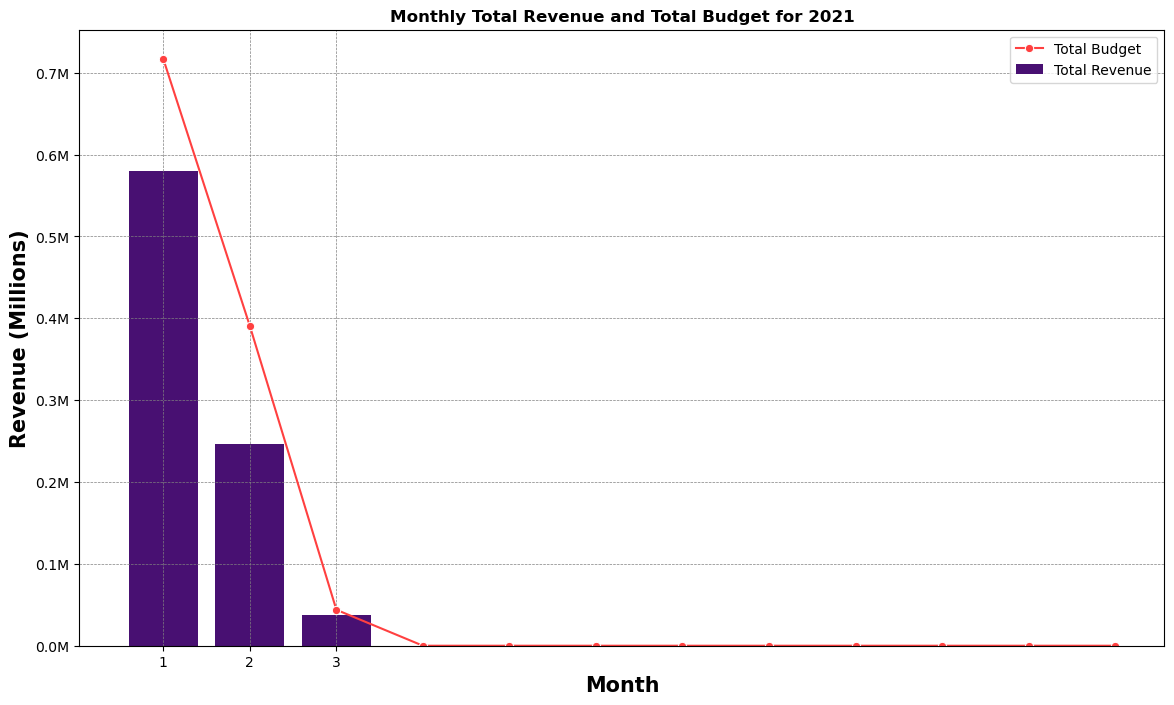

<Figure size 640x480 with 0 Axes>

In [683]:
# Filter actual revenue data for the year 2021 (assuming 'actualrev2' is a valid variable)
actualrev2 = sa[sa["OrderDate"].dt.year == 2021]

# Filter expected revenue (budget) data for the year 2021
exprev2 = bu[bu["Date"].dt.year == 2021]

# Group the actual revenue data by month and sum the 'saleamt' column to get total revenue for each month
actual2 = actualrev2.groupby([actualrev2["OrderDate"].dt.month]).agg(Revenue=("saleamt", "sum")).reset_index()

# Group the expected revenue (budget) data by month and sum the 'Budget' column to get total budget for each month
expected2 = exprev2.groupby([exprev2["Date"].dt.month]).agg(Revenue=("Budget", "sum")).reset_index()

# Create a figure with a specified size (14 inches by 8 inches)
plt.figure(figsize=(14, 8))

# Create a bar plot for actual revenue with the 'OrderDate' on the x-axis and 'Revenue' on the y-axis
# Use a purple color for the bars and add a label for the legend
ax = sns.barplot(x="OrderDate", y="Revenue", data=actual2, errorbar=None, color=(0.294, 0.000, 0.510), label="Total Revenue")

# Create a line plot for expected revenue using the 'Revenue' from the 'expected2' dataset
# The x-axis uses a range from 0 to 11 (for 12 months), and 'Revenue' from 'expected2' is plotted on the y-axis
# Use a red color for the line with markers ('o') and add a label for the legend
sns.lineplot(x=range(len(expected2["Date"])), y=expected2["Revenue"], data=expected2, ax=ax, errorbar=None, marker="o", color=(1.000, 0.251, 0.251), label="Total Budget")

# Format the y-axis to display the values in millions with one decimal place (e.g., 2.5M, 3.1M)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Enable a grid with dashed lines for better readability of the plot
# Set grid color to gray, line style to dashed, and line width to 0.5
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

# Add a legend to the upper right corner of the plot to label the two lines
plt.legend(loc="upper right")

# Set the x-axis label to "Month", with black color, font size 15, and bold font weight
ax.set_xlabel("Month", color="black", fontsize=15, fontweight='semibold')

# Set the y-axis label to "Revenue (Millions)", with black color, font size 15, and bold font weight
ax.set_ylabel("Revenue (Millions)", color="black", fontsize=15, fontweight='semibold')

# Set the title of the plot to "Monthly Total Revenue and Total Budget for 2021"
# The title has black color and bold font weight
ax.set_title("Monthly Total Revenue and Total Budget for 2021", fontweight="semibold", color="black")

# Adjust the layout of the plot to make sure everything fits within the figure without overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [651]:
# Merge the 'sa' DataFrame (e.g., sales data) with the 'pr' DataFrame (e.g., product data)
# Match rows where 'ProductKey' in 'sa' corresponds to 'ID' in 'pr'
# Use a left join to keep all records from 'sa', even if there's no matching 'ID' in 'pr'
cat_rev = sa.merge(
    pr,                     # Right DataFrame to merge with
    left_on="ProductKey",   # Column in 'sa' to match on
    right_on="ID",          # Column in 'pr' to match on
    how="left"              # Perform a left join to retain all rows from 'sa'
)

In [659]:
# Group the merged DataFrame 'cat_rev' by the 'ProductCategory' column
# For each product category, calculate the total (sum) of the 'saleamt' values
# Rename the resulting aggregated column to 'val'
# Reset the index to turn the groupby object back into a DataFrame
# Sort the result by the 'val' column in descending order (highest sales first)
categ = cat_rev.groupby("ProductCategory") \
               .agg(val=("saleamt", "sum")) \
               .reset_index() \
               .sort_values(by="val", ascending=False)

In [661]:
categ

,ProductCategory,val
1,Food,13067458
0,Drink,1482028


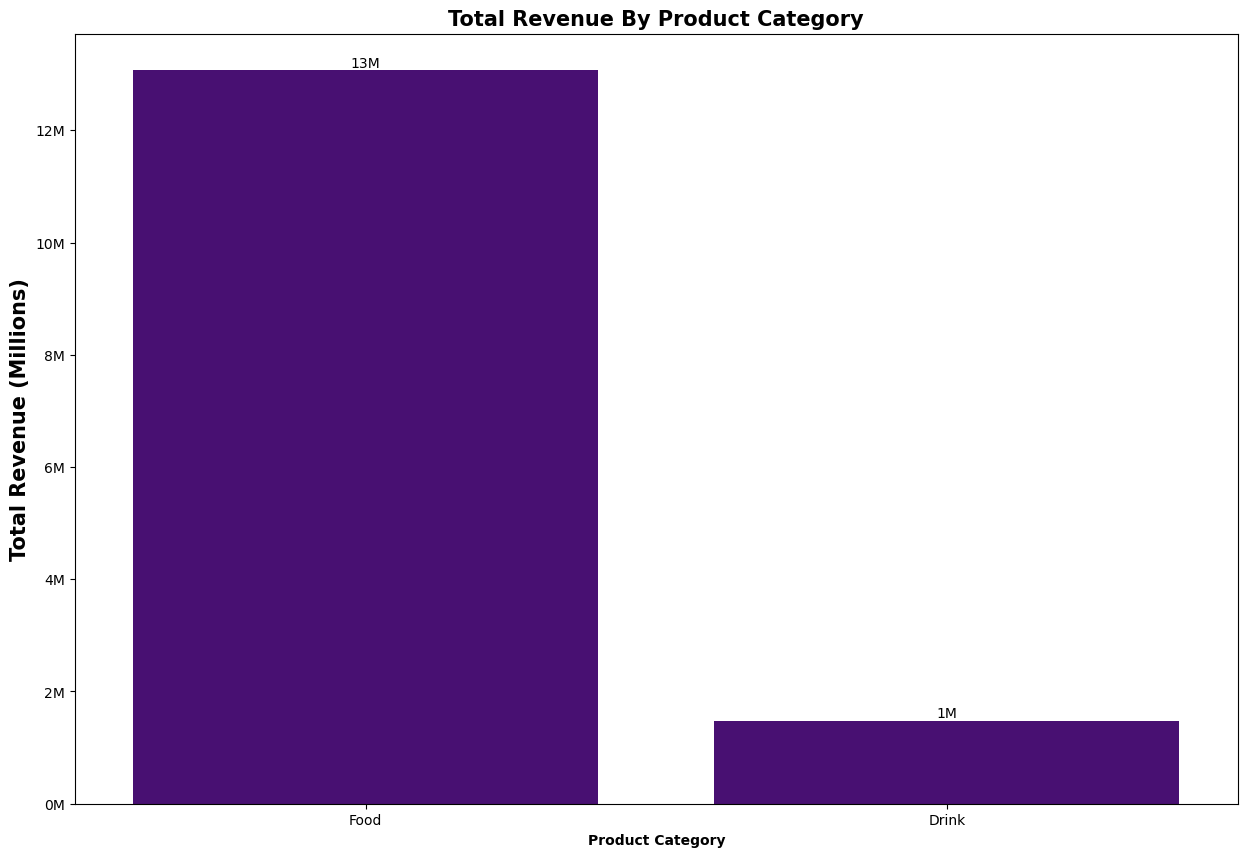

<Figure size 640x480 with 0 Axes>

In [685]:
# Create a figure and axis object with a figure size of 15x10 inches
fig, ax = plt.subplots(figsize=(15, 10))

# Create a barplot of total revenue by product category using the 'categ' DataFrame
# Set the x-axis to 'ProductCategory' and y-axis to 'val' (total revenue)
# Use a custom purple color for the bars
ax = sns.barplot(x="ProductCategory", y="val", data=categ, color=(0.294, 0.000, 0.510))

# Add labels on top of each bar to show the revenue values in millions
for p in ax.patches:
    height = p.get_height()  # Get the height (i.e., value) of each bar
    plt.annotate(
        text=f'{height/1e6:.0f}M',  # Format height as millions (e.g., "25M")
        xy=(p.get_x() + p.get_width() / 2, height),  # Position annotation at the top center of the bar
        ha="center", va="bottom",  # Align text horizontally center and vertically bottom
        fontsize=10, color='black'  # Style the text
    )

# Format the y-axis tick labels to display values in millions (e.g., "10M", "20M")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Set the x-axis label with styling
ax.set_xlabel("Product Category", fontweight="semibold", color="black")

# Set the y-axis label with styling
ax.set_ylabel("Total Revenue (Millions)", color="black", fontsize=15, fontweight='semibold')

# Set the title of the chart with styling
ax.set_title("Total Revenue By Product Category", color="black", fontsize=15, fontweight='semibold')

# Display the plot
plt.show()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

In [695]:
# Group the merged DataFrame 'cat_rev' by the 'ProductGroup' column
# Aggregate the sales amount ('saleamt') by summing it for each product group
# Rename the aggregated column to 'Revenue'
group_rev = cat_rev.groupby("ProductGroup") \
                   .agg(Revenue=("saleamt", "sum")) \
                   .reset_index() \
                   .sort_values("Revenue", ascending=False)  # Sort by revenue in descending order

# Select the top 10 product groups with the highest total revenue
g1 = group_rev.head(10)

Text(0.5, 1.0, 'Total Revenue by Product Group')

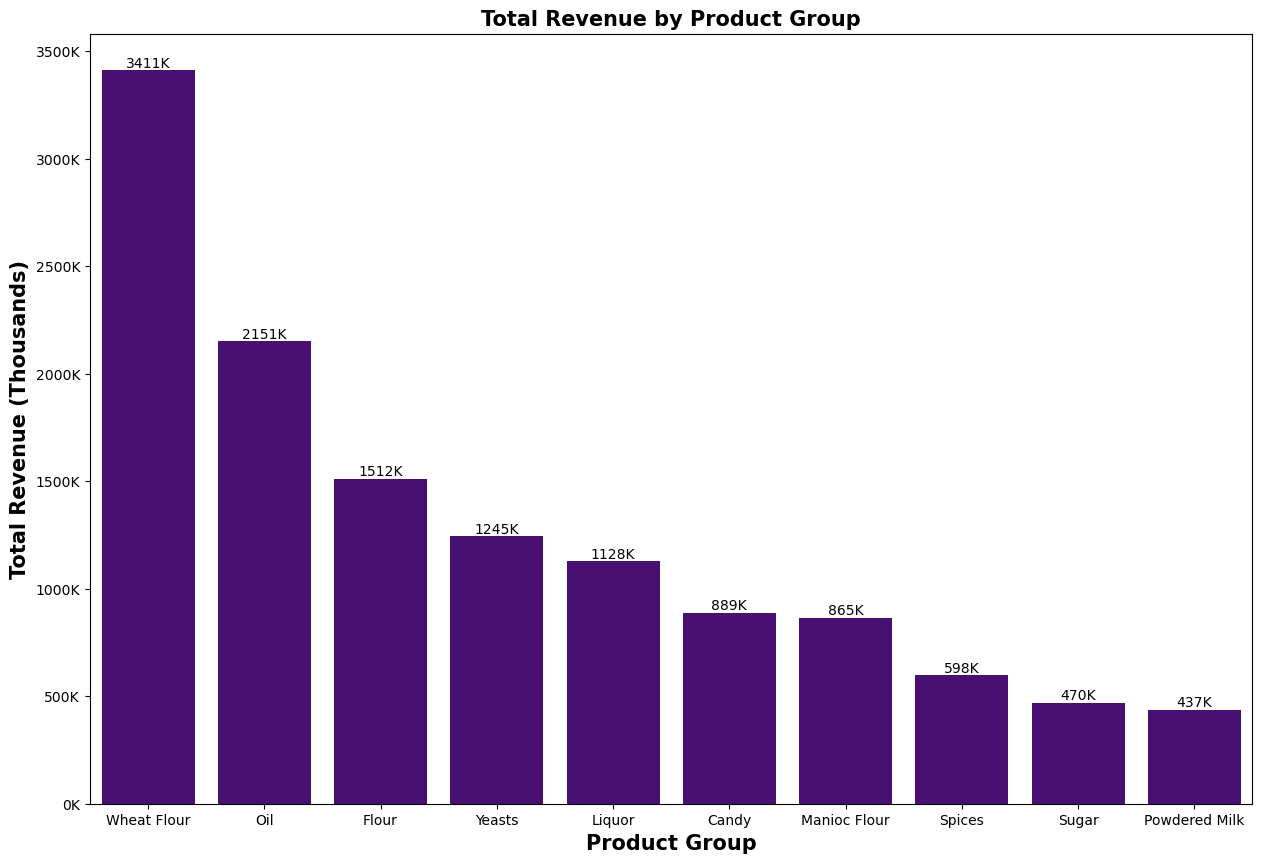

In [733]:
# Create a figure and axis object with a custom figure size (15x10 inches)
fig, ax = plt.subplots(figsize=(15, 10))

# Create a barplot showing total revenue for the top 10 product groups
# X-axis: ProductGroup, Y-axis: Revenue
# Use a deep purple color for the bars
ax = sns.barplot(x="ProductGroup", y="Revenue", data=g1, color=(0.294, 0.000, 0.510))

# Add text annotations on top of each bar to show the revenue in thousands
for p in ax.patches:
    height = p.get_height()  # Get the height (value) of each bar
    plt.annotate(
        text=f'{height/1000:.0f}K',  # Convert value to thousands and format (e.g., "150K")
        xy=(p.get_x() + p.get_width() / 2, height),  # Position at the top-center of each bar
        ha="center", va="bottom"  # Center horizontally, align bottom vertically
    )

# Format y-axis labels to display in thousands with "K" suffix
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e3:.0f}K'))

# Set x-axis label with font styling
ax.set_xlabel("Product Group", color="black", fontsize=15, fontweight="semibold")

# Set y-axis label with font styling
ax.set_ylabel("Total Revenue (Thousands)", color="black", fontweight="semibold", fontsize=15)

# Set chart title with font styling
ax.set_title("Total Revenue by Product Group", color="black", fontweight="semibold", fontsize=15)